# Evaluation metrics for classification

In the Logistic Regression module, we talked about different evaluation metrics for classification. We discussed the accuracy metric and the problem with accuracy. Then we introduced confusion matrix, precision, recall, and F1-score for binary classification. 

In this chapter, we will see how the confusion matrix for multi-class classification looks like and use it to compute precision, recall, and F1-score. Later we will discuss precision-recall tradeoff, ROC curve, and AUC score.



## Confusion matrix for multi-class classification

In this section, we will see how the confusion matrix for multi-class classification looks. The figure below shows the confusion matrix of a hypothetical machine learning model trained on a hypothetical fruit dataset containing three classes: Apple, Banana, and Mango.  

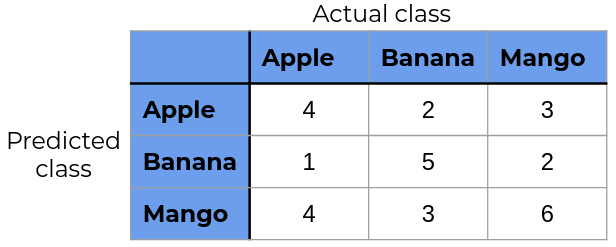
      Figure 1: Confusion matrix for three class classification

In the above confusion matrix, the columns represent the actual class, and the rows represent the predicted class. The above table shows that we have (4+1+4=9) Apples, (2+5+3=10) Banana, and (3+2+6=11) Mangoes. The value of 1 in the confusion matrix indicates that out of 9 Apples, one Apple was predicted as Banana by the classifier. Similarly, the value of 6 indicates that out of 11 Mangoes, 6 Mangoes were predicted as Mango by the classifier. 


The confusion matrix provides all necessary data to compute precision, recall, and F1 Score for each class. 

__Note:__: For multi-class classification, we compute the value of precision, recall, and F1 Score for individual classes.

To calculate precision and recall, we need to compute True Positive(__TP__), False Positive(__FP__), False Negative(__FN__), and True Negative(__TN__).








Let's calculate TP, FP, FN, and TN for class __Apple__.

The figure below shows the cell of true positive(green), true negative(yellow), false positive(light red), and false negative(dark red) for the class Apple.

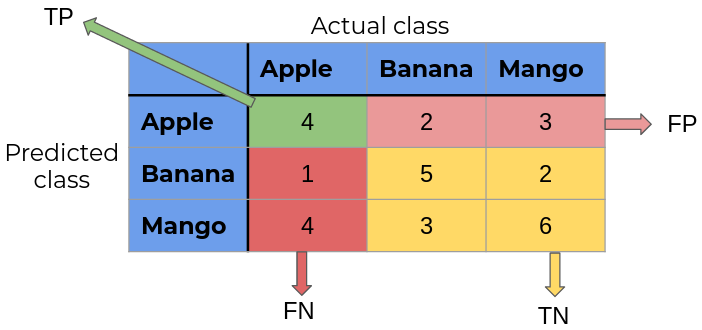

Figure 2. Confusion matrix labeled with TP, FP, FN, TN for class Apple

The value of TP, TN, FP, and FN for class Apple is computed as:

$$\text{True Positive(TP)} = 4$$
$$\text{False Positive(TP)} = 2+3 = 5$$
$$\text{False Negative(FN)} = 1+4=5$$
$$\text{True Negative(TN)} = 5+2+3+6 = 16$$

The precision, recall and F1 Score for class Apple is computed as: 
$$\text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}} = \frac{4}{4+5} = 0.44$$

$$\text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}} = \frac{4}{4+5} = 0.44$$


$$\text{F1 Score} = \frac{2*\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{4}{4+5} = 0.44$$

Similarly, we can calculate TP, FP, FN, and TN and use them to compute precision, recall, and F1 Score for other classes. The figure below shows the value of precision, recall, and F1 Score for all three classes.




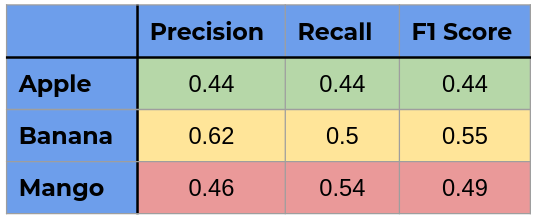

Figure 3. Evaluation metric for each class.


Recall that we had only one F1 Score for binary classification. The above figure shows three F1 Scores for three classes. Suppose the case with 1000 classes. To evaluate the model, we have to evaluate the F1 Score of all 1000 classes, which might be tedious or impracticable. So we want a single real value that can evaluate the overall performance of the model. For this, we have to combine the value of F1 Score of individual classes. There are three different ways to combine them. Let's discuss each of them.


#### 1. Macro F1 Score:
Macro F1 Score is simply an average of F1 Score of individual classes.
In the above table, F1 Score of Apple, Banana, and Mango are respectively 0.44, 0.55, 0.49. Macro F1 Score is calculated as: 

$$\text{Macro F1 Score }= \frac{0.44+0.55+0.49}{3}= 0.4933$$

Since the Macro F1 Score is a simple average, it doesn't consider the number of instances of different classes.



#### 2. Weighted F1 Score:
The weighted F1 Score is a weighted mean of F1 Score of individual classes. The above confusion matrix shows that we have 9 Apples, 10 Banana, and 11 Mango. The weighted F1 Score is calculated as:
$$\text{Weighted F1 Score }= \frac{9* 0.44+ 10*0.55+11*0.49}{9+10+11}= 0.4495$$

The consideration of the number of instances in each class shows that the Weighted F1 Score makes an evaluation on behalf of majority classes. For instance, if the model's performance on the majority class is very good, but bad for the minority class, then the overall score will remain high(good).



#### 3. Micro F1 Score:
The above discussed method calculates the scores based on the score computed for each class. Micro F1 Score, however, calculates the score by considering the total value of TP, FP, FN, and TN. For instance, the total value of TP is the sum of TP of individual classes. It uses total TP, FP, FN, and TN to calculate the precision and recall; later, use these computed precision and recall values to compute the F1 Score.

The total TP, FP, FN, and TN can be computed from the above confusion matrix as:

\begin{align*} 
\text{Total TP} &=  \text{TP}_{\text{Apple}}+\text{TP}_{\text{Banana}}+\text{TP}_{\text{Mango}} = 4+5+6 = 15  \\ 
\text{Total FP} &= \text{FP}_{\text{Apple}}+\text{FP}_{\text{Banana}}+\text{FP}_{\text{Mango}} = (2+3) + (1+2)+ (4+3) = 15\\
\text{Total FN} &= \text{FN}_{\text{Apple}}+\text{FN}_{\text{Banana}}+\text{FN}_{\text{Mango}} = (1+4) + (2+3)+ (3+2) = 15
\end{align*}


<!-- $$\text{Total TP} = \text{TP}_{\text{Apple}}+\text{TP}_{\text{Banana}}+\text{TP}_{\text{Mango}} = 4+5+6= 15$$

$$\text{Total FP} = \text{FP}_{\text{Apple}}+\text{FP}_{\text{Banana}}+\text{FP}_{\text{Mango}} = (2+3) + (1+2)+ (4+3) = 15$$

$$\text{Total FN} = \text{FN}_{\text{Apple}}+\text{FN}_{\text{Banana}}+\text{FN}_{\text{Mango}} = (1+4) + (2+3)+ (3+2) = 15$$ -->

Similarly,
$$\text{Total TN} = 15$$

Now, we calculate precision and recall and use them to calculate Micro F1 Score. These precision and recall are called Micro precision and Micro recall respectively.
$$\text{Micro Precision} = \frac{\text{Total TP}}{\text{Total TP}+\text{Total FP}} = \frac{15}{15+15}= 0.5$$

$$\text{Micro Recall} = \frac{\text{Total TP}}{\text{Total TP}+\text{Total FN}} = \frac{15}{15+15}= 0.5$$

Then, 

$$\text{Micro F1 Score} = \frac{2*0.5*0.5}{0.5+0.5}=0.5$$

In this way, we discussed different methods to combine the score of all classes to obtain a single score that evaluates the model's overall performance and not just the particular class.

__Note : Macro, Micro and Weighted averaging methods can be used to combine other classification metrics like precision, recall, etc.__

## Precision-Recall tradeoff

Until now, we have discussed how to compute the precision, recall, and F1 Score for multi-Class classification problem. The concept of precision, recall, and F1 Score for multi-class classification remains the same as binary classification. We have discussed Precision and Recall in the Logistic Regression module. There lie some sorts of a tradeoff between precision and recall. If we try to increase precision, the recall score reduces, and vice versa. This is called __precision-recall tradeoff__. Based on the problem at hand, sometimes we want to get a high value of precision; other times, we may want a high recall value. The value of precision and recall are adjustable. We can get high precision compromising the recall and vice versa.









### How to decide if the evaluation based on precision is better or based on recall?

The choice of evaluation metrics depends on the nature of the problem at our hand and is domain specific. Talking about the choice of precision and recall is also based on the type of problem. In some applications, we want recall to be high. While in other applications, we want a high precision. For example, for the cancer diagnosis system, False Positives (false prediction of a patient as having cancer) are acceptable than False negative (false prediction of a patient as not having cancer), which means we want to have a high recall.

However, for the spam classification system, False Negatives are more acceptable than False positives, which means we want to have high precision than recall.

While for other problems, we may want both precision and recall to be high and have a good balance.


## Precision Recall Curve

Until now, we have discussed the tradeoff between precision and recall. We also discussed a few cases of evaluation in which one is better than the other. In this section, we will see how to obtain different pairs of precision and recall and use them to plot the precision-recall curve. The precision-recall curve shows the values of precision and recall at different values of threshold.


Recall in the Logistic Regression module, we passed the output of a linear regressor through a sigmoid function that returns the probability with a value between 0 and 1. The output of a sigmoid function with a value greater than 0.5 was labeled positive class, and with a value less than 0.5 was labeled negative class. Here, 0.5 is a threshold value. 

We can select the different values of the threshold based on our requirements. The selection of different values of threshold yields different values of precision and recall. The plot of these different values of precision and recall gives a precision-recall curve. 

__Note :__ Sometimes tuning the value of the threshold may increase the value of both precision and recall by some amount. 







Let's discuss how to build a precision-recall curve with the help of an example.

Suppose we trained a classifier on some hypothetical binary dataset about student and want to predict if the students will pass(1) or fail(0). The table below shows different students, their actual labels(if they passed or failed), and the probability scores predicted by the classifier. 

__Note:__ The classifiers in sklearn provide a method [predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba), which returns predicted class probability. 

The table also shows the predicted label for different values of thresholds. The fourth column shows the predicted label when the threshold is 0.5. If we observe, probability scores greater than 0.5 are labeled 1, and the rest are labeled 0.


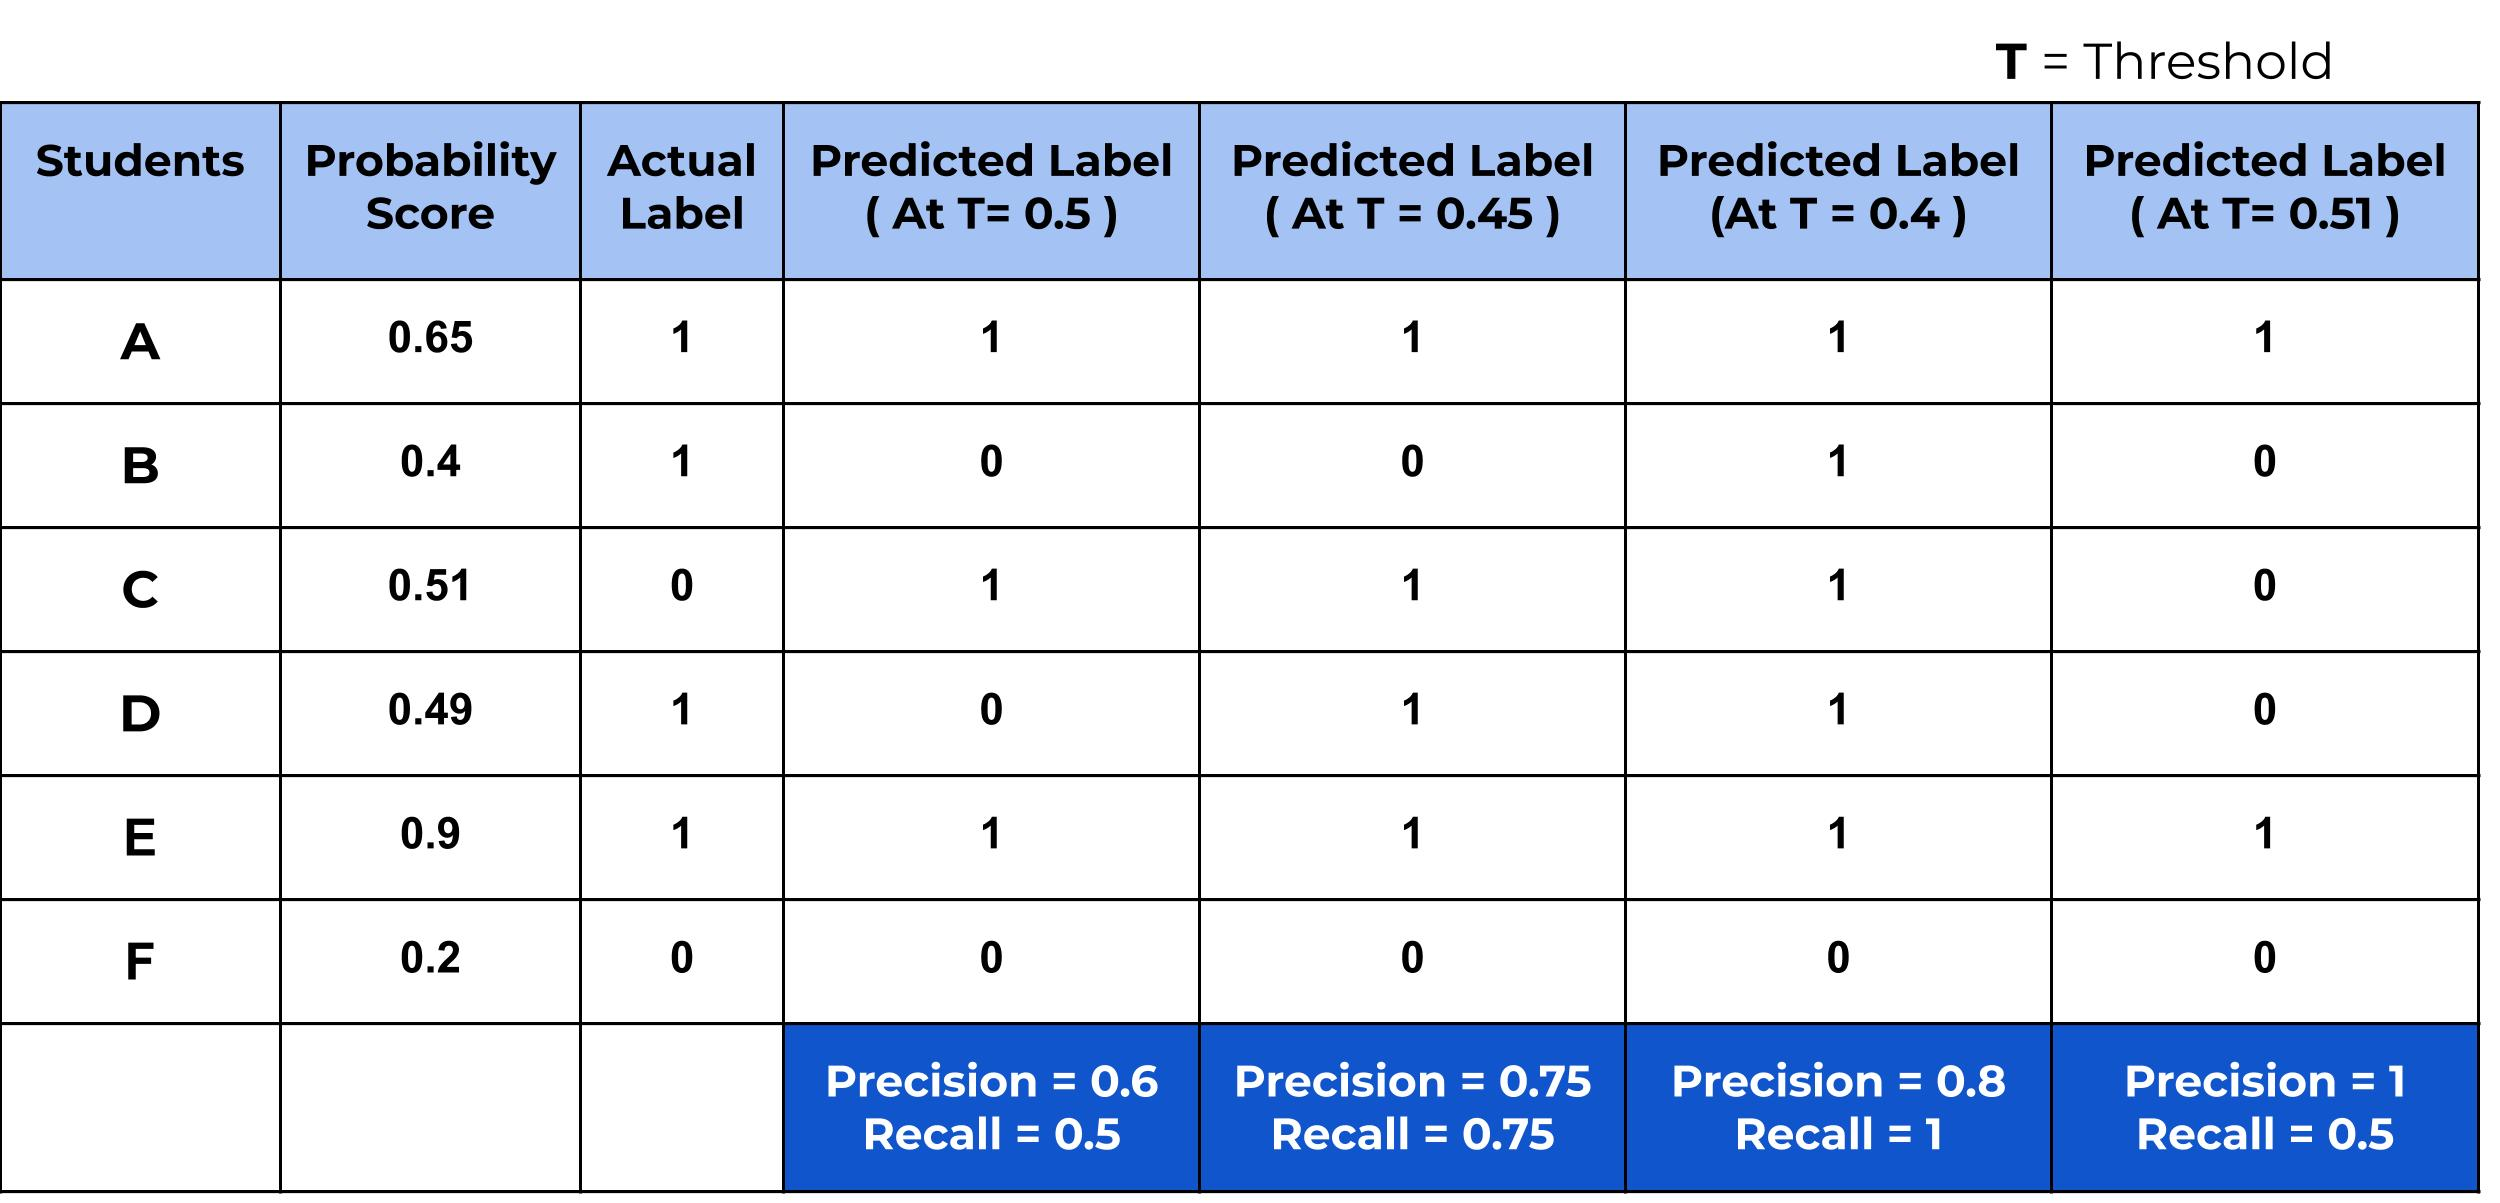
Figure 4. Precision - recall at different thresolds

In the above table, we compute labels for four different values of threshold, use those labels to compute the precision and recall. Notice that both the precision and recall score at the threshold of 0.4 is larger.

 


The precision-recall curve is nothing but just the plot between precision and recall at different values of threshold. When we plot the precision on the y-axis and recall on the x-axis, we obtain the following precision-recall curve.

<div align="center">
<figure>
<img src="output_QXlJ4S.gif" width = "40%" >
<figcaption>Figure 5. Precision-recall curve visualization
</figcaption>
</figure>
</div>



The above curve shows the precision-recall curve for four different values of the threshold. Generally, a large number of threshold values are chosen, and their corresponding precision-recall values are plotted.  __Most of the time, each probability score is chosen as threshold__. 



The figure below shows a typical precision-recall curve of a classifier trained on some hypothetical dataset. 



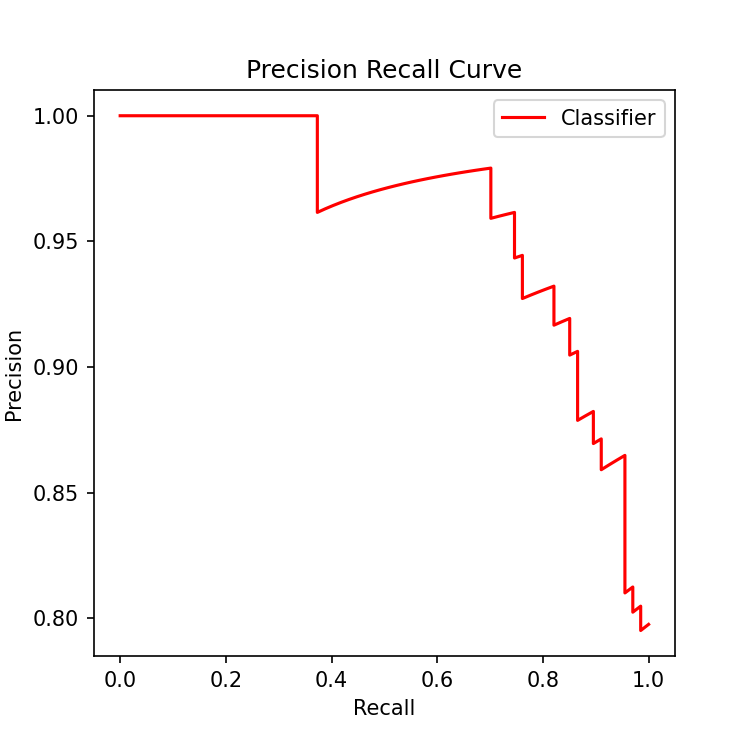

Figure 6. Precision - recall curve of a classifier trained on Student

As seen from the above table, precision is high for the low value of recall. When the recall is increased, the precision decreases. The curve clearly shows the precision-recall tradeoff.

##  Receiver Operating Characteristic(ROC) Curve

The precision-recall curve depicts the graphical relation between precision and recall at different thresholds. Receiver Operating Characteristics curve, on the other hand, represents a relation between True Positive Rate (__recall__) and False Positive Rate (NOT __precision__). 

The evaluation based on precision, recall, and the precision-recall curve is more __focused on the positive class__. However, __if the negative class is also equally important as a positive class__, we need to evaluate the model based on the __ROC curve and AUC evaluation metrics__. We will discuss the AUC evaluation metric later.



 ROC curve is a two-dimensional graph in which the True Positive Rate (__TPR__) and False Positive Rate (__FPR__) for different values of __threshold__ are plotted on y-axis and x-axis respectively.

__Note :__
$$\text{TPR} = \frac{\text{TP}}{\text{TP}+\text{FN}}$$

$$\text{FPR} = \frac{\text{FP}}{\text{FP}+\text{TN}}$$




Let's discuss how to build a ROC curve with the help of an example.


Suppose we trained a classifier on some hypothetical binary dataset about student and want to predict if the students will pass(1) or fail(0). The table below shows different students, their actual labels (if they passed or failed), and the probability scores predicted by the classifier. 

The table also shows the predicted label for different values of thresholds. For instance, the fifth column shows the predicted labels when the threshold is 0.5. If we observe, probability scores greater than 0.5 are labeled 1, and the rest are labeled 0.


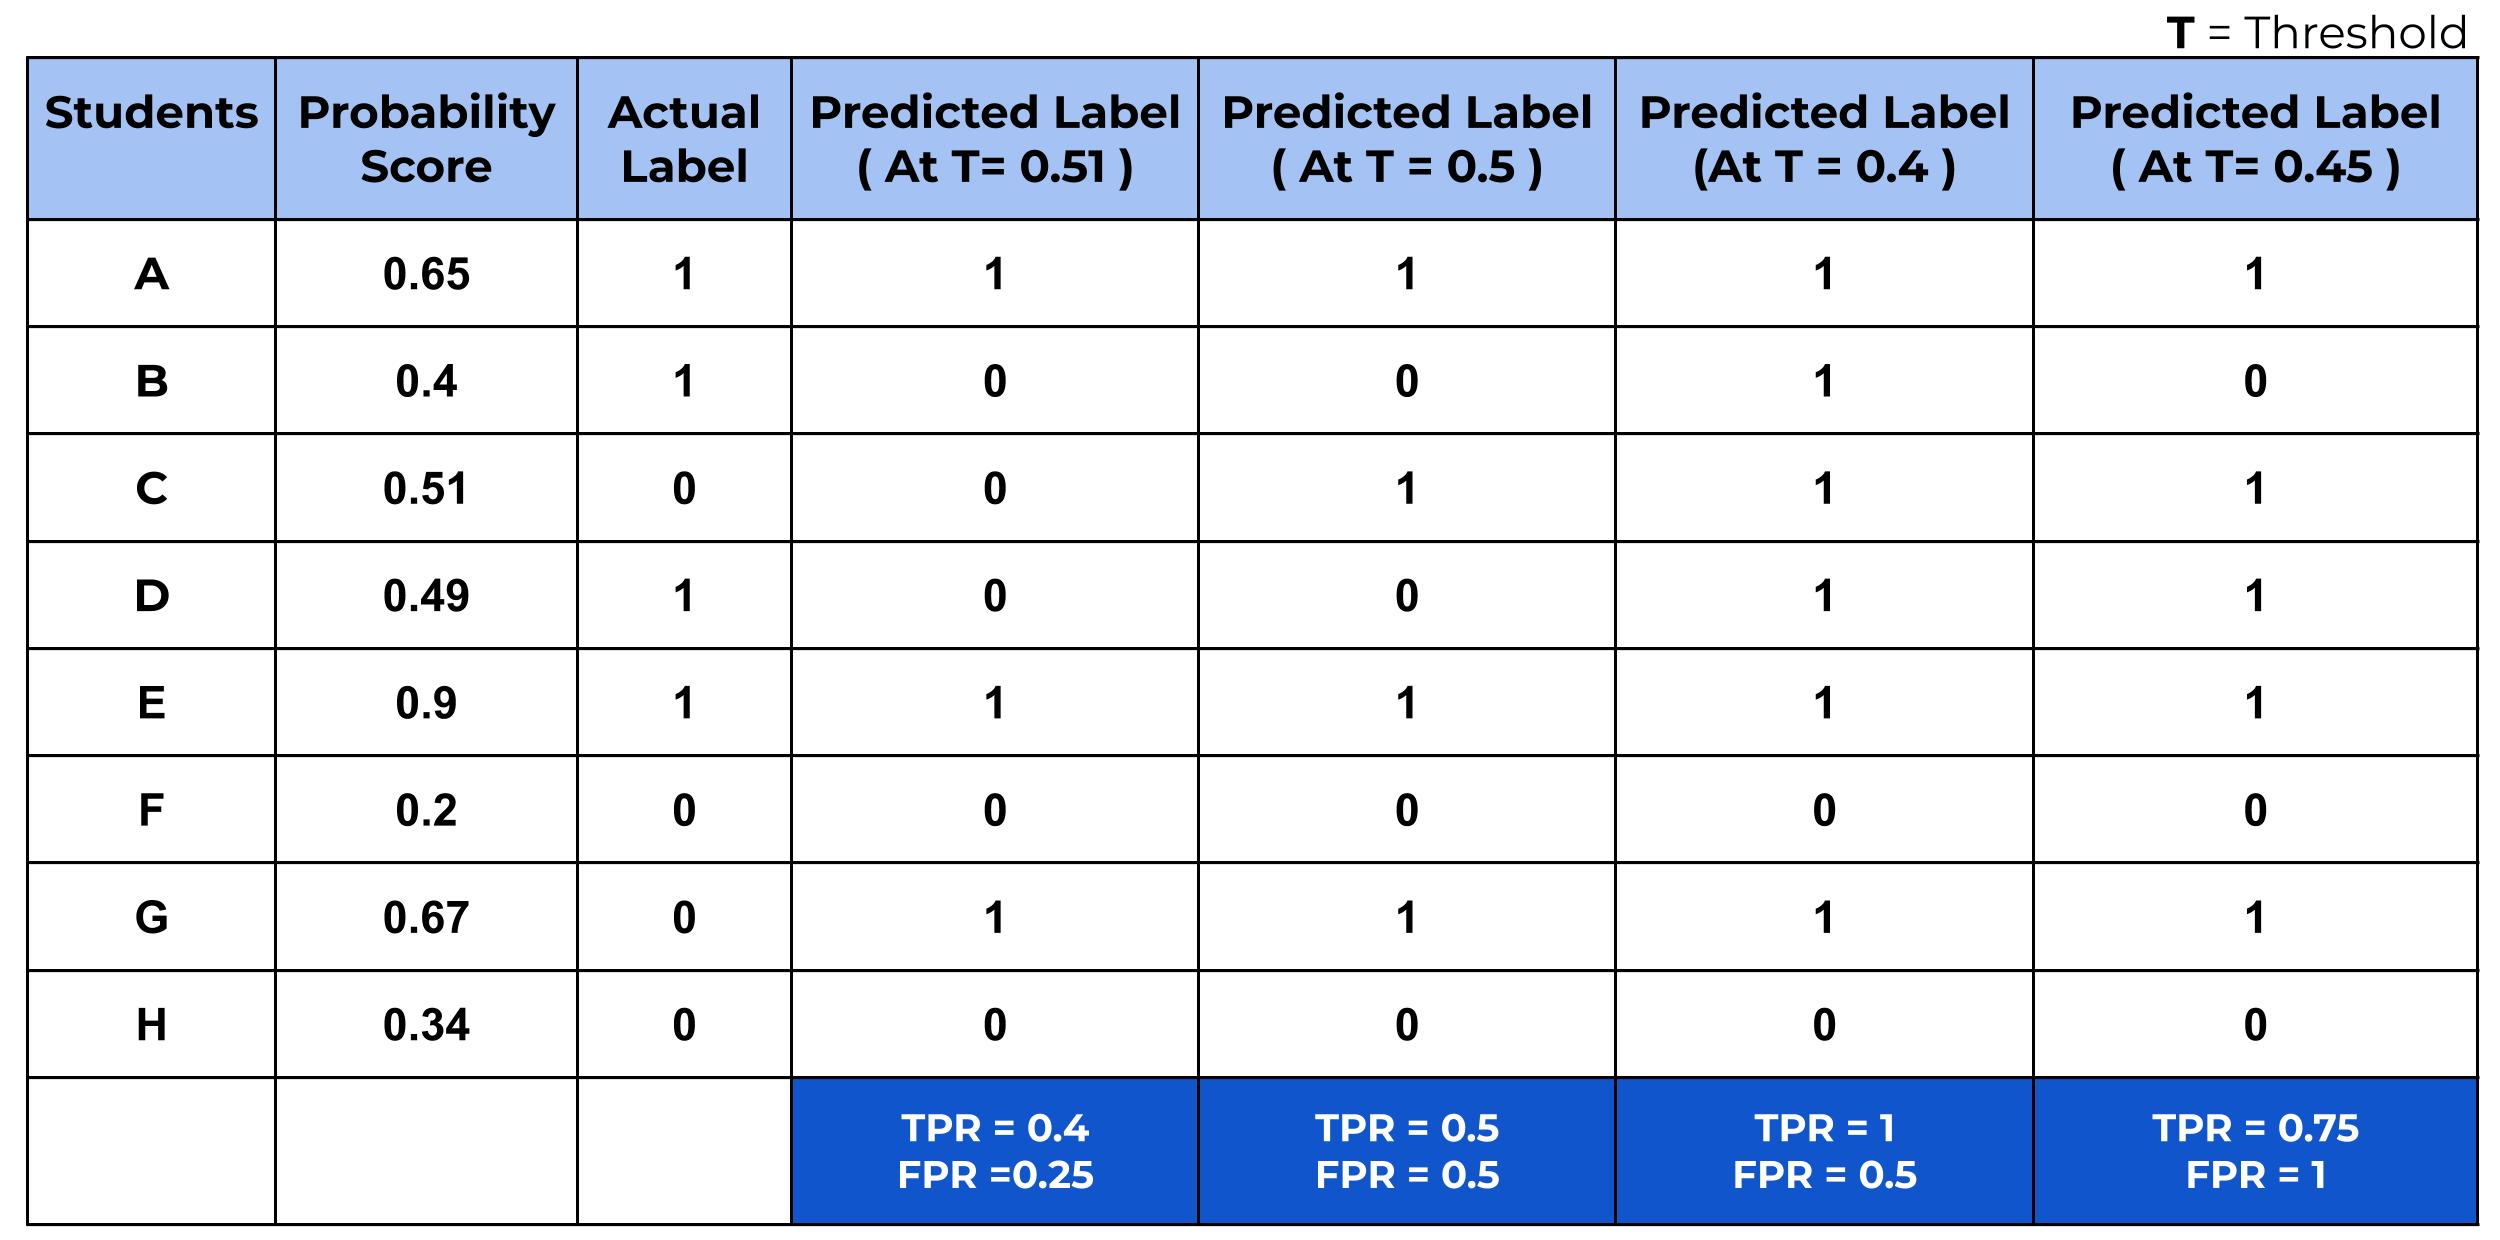

Figure 7. TPR and FPR at different thresholds.

In the above table, we computed labels for four different threshold values and used those labels to compute the value of TPR and FPR. 

 


The ROC curve is nothing but just the plot between TPR and FPR at different values of threshold. When we plot the TPR on the y-axis and FPR on the x-axis, we obtain the following ROC curve.


<div align="center">
<figure>
<img src="DT_gif.gif" width = 40% >
<figcaption> Figure 8. ROC curve visualization.
</figcaption>
</figure>
</div>



The above curve shows the TPR and FPR for four different values of the threshold. Generally, many threshold values are chosen, and their corresponding TPR and FPR values are plotted.  __Most of the time, each probability score is chosen as threshold__. 



The figure below shows the ROC curve for three classifiers: Perfect classifier, typical classifier, and random classifier trained on some hypothetical binary dataset. A perfect classifier makes the perfect decision (it makes no mistakes), a typical classifier is a general Machine Learning classifier which makes some mistakes. A random classifier is one that randomly makes a prediction. 



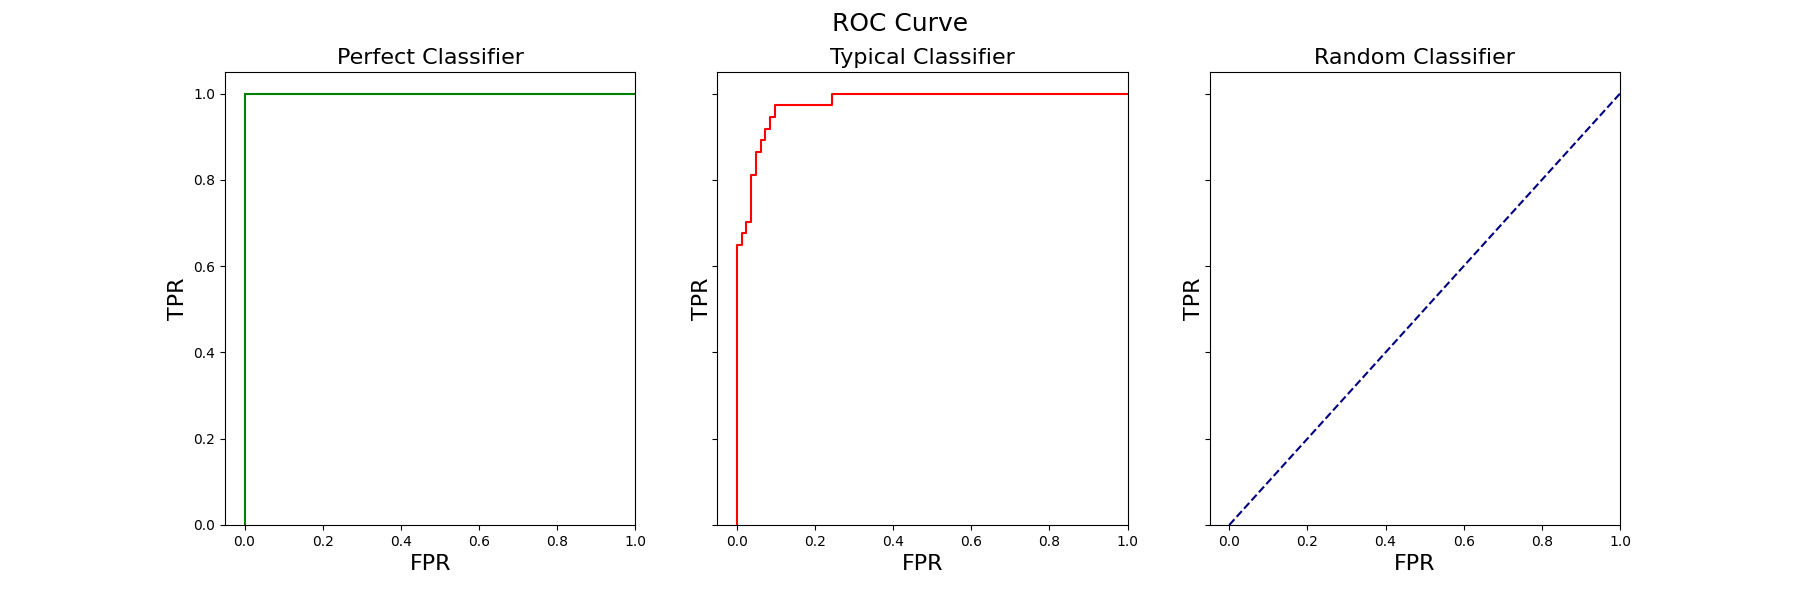

Figure 9. ROC curve for three hypothetical classifiers.

We can observe the nature of the ROC curve for three different classifiers. Note that the ROC curve is extended to the top left part for the perfect classifier, and for a random classifier, the ROC curve passes through the diagonal. The more the curve lies in the top left part, the better is the classifier.


We can see that the ROC curve can be used to evaluate the performance of the classifier. It can also be used to compare the performance of multiple classifiers. For the multi-class classification problem, we can plot the ROC curve for each class and assess the classifier's performance for each class.

## Area Under Curve (AUC)

We have already discussed ROC curve and see how it can be used to compare the performance of multiple classifiers. 
In machine learning, we perform experiments by creating different classifiers, using different hyperparameters, and evaluating them to see if the classifiers' performance is improved.  Looking at the ROC curve every time we build a model might not be feasible. Typically in Machine learning, we do not look at the ROC curve explicitly every time. Instead, we directly check the AUC score of the model.



Area Under Curve or simply Area Under ROC curve is an alternate representation of the ROC curve in a numerical form and represents the area under the ROC curve. 

Figure 9 shows the ROC curve for three classifiers. __For perfect classifier, the AUC score is 1; for random classifier, the AUC score is 0.5; for typical classifier the AUC score is between 0.5 and 1__. Higher is the value of AUC, better is the classifier's capability to distinguish the classes.


For a multi-class classification problem, we can plot the ROC curve for each class. For each curve, we have different values of AUC that indicate how good the classifier is at identifying that particular class. We can summarize the values of AUC of each class using different policies/methods like micro, macro, etc. in the same way we used to summarize the F1 Score of multiple classes.


In this way, we are at the end of this chapter. We talked about the confusion matrix for multi-class classification and how we can combine F1 Score using different schemes like micro, macro, etc. We also discussed precision-recall tradeoff with the help of a precision-recall curve. We also learned how to generate the ROC curve and use it to compute the AUC score.

### Key takeaways

<!-- - For multi-class classification, the metrics are computed for each of the classes and combined by methods such as Macro, Micro, or Weighted Average.


- Precision - recall curve is the plot between precision and recall at different values of threshold.

- Precision - recall trade-off shows that increasing both precision and recall at the same time is not possible.

- ROC curve is the plot between True positive rate and False positive rate at different thresholds.


- AUC score is an area under the ROC curve. -->



- The precision, recall and F1-score of different classes are summarized using different averaging techniques like Micro, Macro and Weighted averaging.

- Precision-Recall curve is a plot between precision and recall at different thresholds and is used to maintain tradeoff between precision and recall of positive class.

- Precision - recall trade-off shows that increasing both precision and recall at the same time is not possible.

- ROC curve is a plot between True positive rate and False positive rate at different thresholds and gives better evaluation of both positive and negative classes.

- AUC score is an area under the ROC curve and gives the numerical representation of ROC the curve.



### Additional Resources
 
* Books 
    * INFORMATION RETRIEVAL, C. J. van RIJSBERGEN http://www.dcs.gla.ac.uk/Keith/Chapter.7/Ch.7.html

        * Precision- recall is used extensively in Information retrieval problems. This book covers in great detail.


* Articles
   * Jakub Czakon , Which Evaluation Metric Should You Choose?, https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc
       * The article briefly explains choosing evaluation metrics for classification problems.
   *  ROC Curve Visualization, http://www.navan.name/roc/
     * Scikit-learn Evaluation metrics - https://scikit-learn.org/stable/modules/model_evaluation.html



* Papers
    * The receiver operating characteristic (ROC) curve , Shengping Yang PhD, Gilbert Berdine MD , https://www.researchgate.net/publication/316751328_The_receiver_operating_characteristic_ROC_curve

        * Read: Page 2 discusses selecting optimal threshold value from ROC Curve.
    * The Relationship Between Precision-Recall and ROC Curves, Jesse Davise, MarkGoadrich, https://www.biostat.wisc.edu/~page/rocpr.pdf
       

    

 
